In [1]:
import sys
import numpy as np
import pandas as pd
from scipy import special
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize as NormColor
from tqdm.notebook import tqdm
sys.path.append(".")
import HOD
from astropy.cosmology import Planck15
cosmo = Planck15 #FlatLambdaCDM(H0=67.74, Om0=0.3089, Tcmb0=2.725)
h = cosmo.H(0).value/100

/var/folders/wk/scnpc33x3q348qw83nb1tcgw0000gn/T/ipykernel_55833/1403303214.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


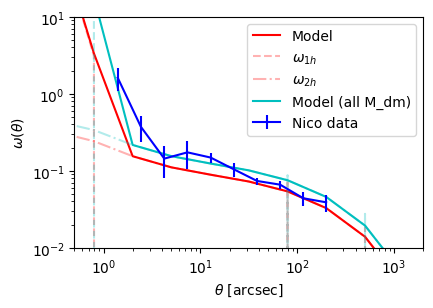

In [3]:
M_sat, M_min, sigma_logM, alpha = 10**12, 10**11.2, 0.2, 1.0
HIGH_RES, _INTRP = 0, 1

zz = np.array([5.    , 5.2475, 5.495 , 5.7425, 5.99  ])
z_array = (zz[:-1] + zz[1:]) / 2
N = np.array([448, 451, 641, 535])
w_obs = np.array([1.62159772, 0.37306552, 0.14413575, 0.17384627, 0.14877287, 0.10469127, 0.07389844, 0.06610705, 0.04405596, 0.03900939])
w_err = np.array([0.52663385, 0.13507835, 0.06413887, 0.06794559, 0.0229982 , 0.02041773, 0.00789723, 0.00806796, 0.00878693, 0.00962475])

bin_centre = np.array([1.3977544 ,   2.42791058,   4.23306435,   7.33872431, 12.74758672,
                        22.14320549,  38.43186415,  66.63374299,115.39951339, 198.93851897])
# plt.errorbar(bin_centre,w_obs, w_err, c='b')

N_norm = N / (np.sum(N) * np.diff(zz)[0])
t_Nico = bin_centre/206265

th_arr = np.logspace(-0.5, 3.5, 11)/206265
o1_N, o2_N = HOD.omega(th_arr, M_min, sigma_logM, M_sat, alpha, N_norm, z_array,
                       REWRITE_TBLS=0, LOW_RES=(not HIGH_RES), VERBOSE = 0, INTERPOLATION = _INTRP,
                       mag_min = -22.3, mag_max = -15.5)

SHOW_HALO_TERMS = 1
_oN = np.copy(o1_N)
_oN[_oN<0] = 0
_oN[th_arr>=35/206265] = 0
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
ax.plot(th_arr*206265, _oN+o2_N, c = 'r', ls = '-', label='Model')
if SHOW_HALO_TERMS:
    ax.plot(th_arr*206265, o1_N    , c = 'r', ls = '--', alpha = 0.3, label=r'$\omega_{1h}$')
    ax.plot(th_arr*206265, o2_N    , c = 'r', ls = '-.', alpha = 0.3, label=r'$\omega_{2h}$')

##########################################################################################
o1_N, o2_N = HOD.omega(th_arr, M_min, sigma_logM, M_sat, alpha, N_norm, z_array,
                       REWRITE_TBLS=0, LOW_RES=(not HIGH_RES), VERBOSE = 0, INTERPOLATION = _INTRP)
SHOW_HALO_TERMS = 1
_oN = np.copy(o1_N)
_oN[_oN<0] = 0
_oN[th_arr>=35/206265] = 0
ax.plot(th_arr*206265, _oN+o2_N, c = 'c', ls = '-', label='Model (all M_dm)')
if SHOW_HALO_TERMS:
    ax.plot(th_arr*206265, o1_N    , c = 'c', ls = '--', alpha = 0.3)
    ax.plot(th_arr*206265, o2_N    , c = 'c', ls = '-.', alpha = 0.3)
##########################################################################################
ax.errorbar(bin_centre,w_obs, w_err, c='b', label='Nico data')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.5,2e3))
ax.set_ylim((1e-2, 1e1))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
plt.legend()
plt.show()

In [3]:
z, M_min, M_sat = 10, 1e12, 1e13
z_array, N_z_nrm = np.array([z-0.2, z, z+0.2]), np.array([1/3, 1/3, 1/3])
theta = np.array([1, 10, 100])/206265
sigma_logM, alpha = 0.2, 1
HOD.omega(theta, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, LOW_RES=True, INTERPOLATION=True, VERBOSE=True)

ValueError: operands could not be broadcast together with shapes (360,) (320,) 

  0%|          | 0/6 [00:00<?, ?it/s]

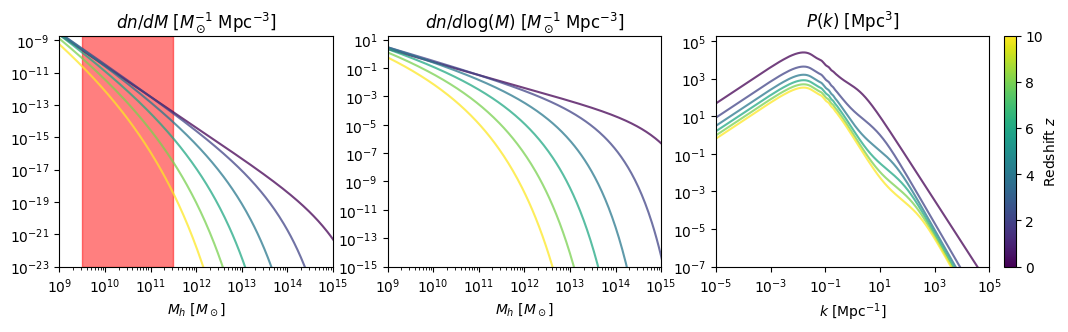

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharex=False, sharey=False)
z_display = np.array([0,2,4,6,8,10])
color = iter(cm.viridis(np.linspace(0,1,len(z_display))))
for z in tqdm(z_display):
    hmf_mass, hmf_dndm, hmf_nu, hmf_k, hmf_PS = HOD.init_lookup_table(z, 0, REWRITE_TBLS = 0)
    hmf_mass = hmf_mass * h
    hmf_dndm = hmf_dndm / h**4
    hmf_k  = hmf_k / h
    hmf_PS = hmf_PS * h**3
    _col_ = next(color)
    ax[0].plot(hmf_mass, hmf_dndm, c = _col_, ls = '-', alpha=0.75)
    ax[1].plot(hmf_mass, hmf_dndm*hmf_mass, c = _col_, ls = '-', alpha=0.75)
    ax[2].plot(hmf_k   , hmf_PS  , c = _col_, ls = '-', alpha=0.75)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'$M_h$ [$M_\odot$]')
ax[0].set_title(r'$dn/dM$ [$M_\odot^{-1}$ Mpc$^{-3}$]')
ax[0].set_xlim((1e9,1e15))
ax[0].set_ylim((1e-23,2e-9))
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$M_h$ [$M_\odot$]')
ax[1].set_title(r'$dn/d\log(M)$ [$M_\odot^{-1}$ Mpc$^{-3}$]')
ax[1].set_xlim((1e9,1e15))
ax[1].set_ylim((1e-15,2e1))
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xlabel(r'$k$ [Mpc$^{-1}$]')
ax[2].set_title(r'$P(k)$ [Mpc$^3$]')
ax[2].set_xlim((1e-5,1e5))
ax[2].set_ylim((1e-7,2e5))
p0 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([0.912, 0.11, 0.01, 0.77])
norm = NormColor(vmin=np.min(z_display),vmax=np.max(z_display))
s_m = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
s_m.set_array([])
cbar = plt.colorbar(s_m, cax=ax_cbar)
cbar.set_label(r'Redshift $z$', labelpad=0)

ax[0].axvspan(10**9.5, 10**11.5, color='r', alpha=0.5)
plt.show()

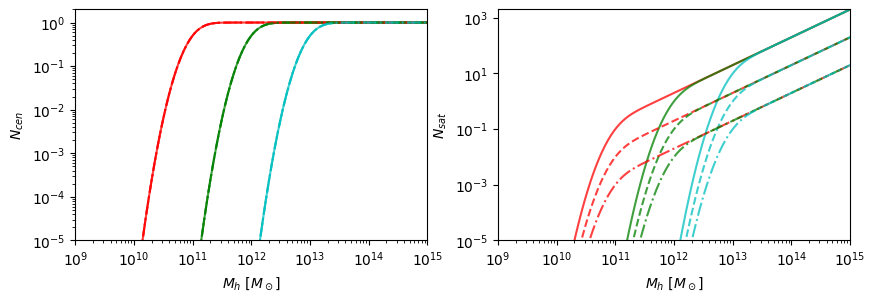

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharex=False, sharey=False)
z_display = np.array([0,2,4,6,8,10])
color = iter(cm.viridis(np.linspace(0,1,len(z_display))))
for M_sat, _ls in zip([5e11, 5e12, 5e13], ['-', '--', '-.']):
    for M_min, _c in zip([1e11, 1e12, 1e13], ['r', 'g', 'c']):
        Ncen = HOD.N_cen(hmf_mass, M_min, 0.2)
        Nsat = HOD.N_sat(hmf_mass, M_sat, 1, M_min, 0.2)
        ax[0].plot(hmf_mass, Ncen, c = _c, ls = _ls, alpha=0.75)
        ax[1].plot(hmf_mass, Nsat, c = _c, ls = _ls, alpha=0.75)
        # ax[0].axvline(M_min, c = _c,  alpha=0.4)
        # ax[1].axvline(M_min, c = _c,  alpha=0.4)
        # ax[0].axvline(M_sat, c = 'k', ls = _ls,  alpha=0.2)
        # ax[1].axvline(M_sat, c = 'k', ls = _ls,  alpha=0.2)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'$M_h$ $[M_\odot]$')
ax[0].set_ylabel(r'$N_{cen}$')
ax[0].set_xlim((1e9,1e15))
ax[0].set_ylim((1e-5,2e0))
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$M_h$ $[M_\odot]$')
ax[1].set_ylabel(r'$N_{sat}$')
ax[1].set_xlim((1e9,1e15))
ax[1].set_ylim((1e-5,2e3))

plt.show()

In [54]:
M_h_array, HMF_array, hmf_nu, hmf_k, hmf_PS = HOD.init_lookup_table(z,
                                                                        PRECOMP_UFT = False,
                                                                        REWRITE_TBLS = False,
                                                                        LOW_RES = True,
                                                                        M_DM_min = 1e9, M_DM_max = np.inf)

np.log10(hmf_k[np.argmax(hmf_PS)])

-1.9558423062402952

  0%|          | 0/6 [00:00<?, ?it/s]

#### z:  10.0  ########################
Integral 1cs: -6.7e+00 \pm 0.0e+00
Integral 1ss: -1.0e+00 \pm 0.0e+00
Integral 2cc: 4.6e-01 \pm 0.0e+00
#### z:  8.0  ########################
Integral 1cs: -1.3e+00 \pm 0.0e+00
Integral 1ss: -2.5e-01 \pm 0.0e+00
Integral 2cc: 7.1e-01 \pm 0.0e+00
#### z:  6.0  ########################
Integral 1cs: 1.7e-01 \pm 1.8e-02
Integral 1ss: 3.5e-02 \pm 4.6e-05
Integral 2cc: 1.2e+00 \pm 2.4e-13
#### z:  4.0  ########################
Integral 1cs: -7.9e-01 \pm 0.0e+00
Integral 1ss: -1.3e-02 \pm 0.0e+00
Integral 2cc: 2.5e+00 \pm 0.0e+00
#### z:  2.0  ########################
Integral 1cs: 3.2e-01 \pm 0.0e+00
Integral 1ss: 1.6e-04 \pm 0.0e+00
Integral 2cc: 8.1e+00 \pm 0.0e+00
#### z:  0.1  ########################
Integral 1cs: 8.8e-01 \pm 0.0e+00
Integral 1ss: 6.4e-01 \pm 0.0e+00
Integral 2cc: 3.4e+02 \pm 0.0e+00


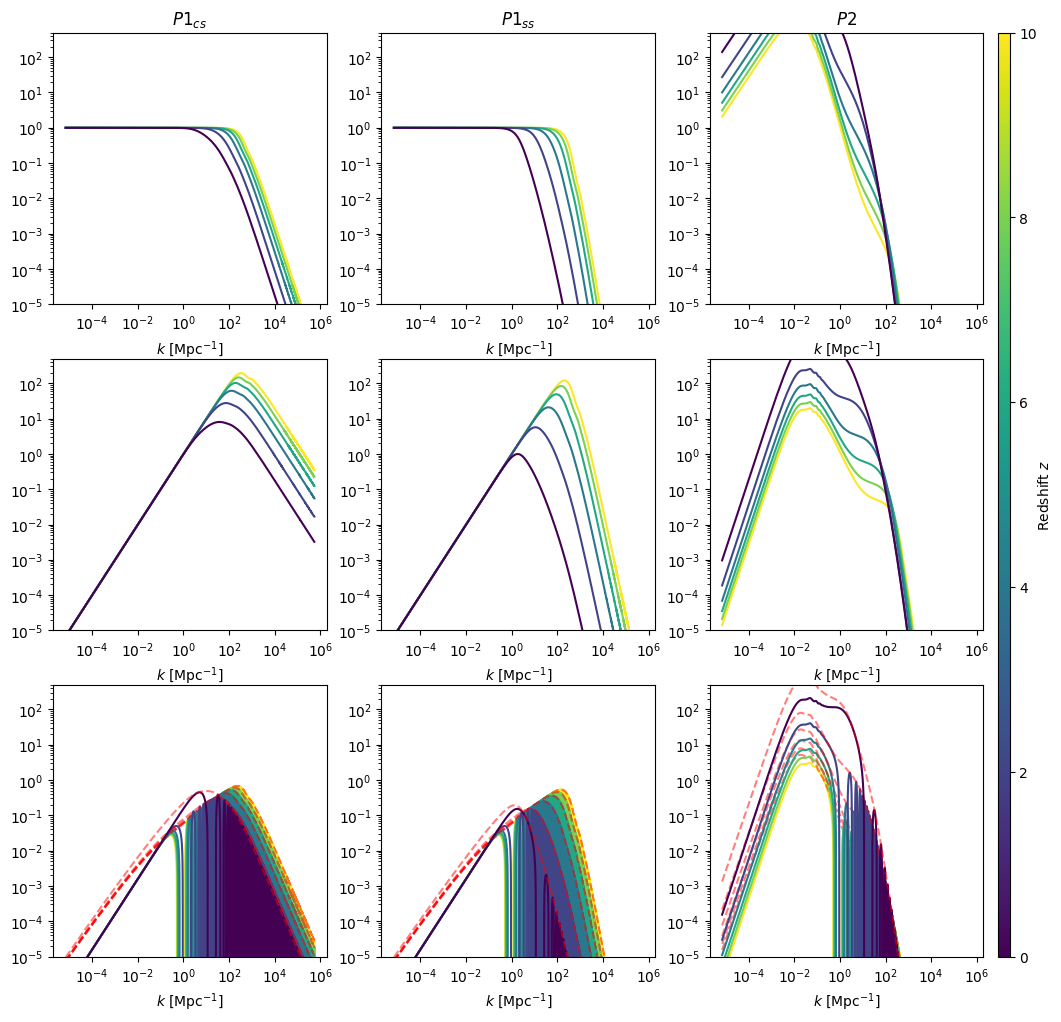

In [58]:
M_min, M_sat = 10**10.5, 10**11.5
alpha, sigma_logM = 1, 0.2
theta = 100/206265

from scipy.integrate import simpson

def PS_1cs_1ss_2_terms(z, M_h_array, HMF_array, NCEN, NSAT, U_FT, bias):
    if U_FT is None:
        crit_dens_rescaled = (4/3*np.pi*cosmo.critical_density(z).value*200*2e40)
        U_FT = np.array([HOD.u_FT(k, M_h_array, z, crit_dens_rescaled) for k in hmf_k])
    PS1cs = np.trapz(HMF_array * NCEN * NSAT * U_FT, M_h_array) * 2
    PS1ss = np.trapz(HMF_array * NSAT * NSAT * U_FT * U_FT, M_h_array) * 1
    PS_2h = np.power(np.trapz((NCEN + NSAT) * HMF_array * bias * U_FT, M_h_array), 2)
    return np.array([PS1cs, PS1ss, PS_2h])
from halomod.bias import Tinker10

def check_integral_err(theta, z, P_1cs, P_1ss, PS_2h, Bessel, k_array, hmf_PS, STEP_J0 = 10_000):
    comoving_distance_z = cosmo.comoving_distance(z).value
    j_0_zeros = np.append(1e-4, special.jn_zeros(0, STEP_J0))
    res1cs, res1ss, res2cc = np.zeros(0), np.zeros(0), np.zeros(0)
    k0 = j_0_zeros / theta / comoving_distance_z
    mask_k = k_array < k0[0]
    k_intr = np.append(k_array[mask_k], k0[0])
    Bessel = np.array([special.j0(k*theta*comoving_distance_z) for k in k_array[mask_k]])
    int1cs = simpson(np.append(P_1cs[mask_k], 0)
                    * k_intr / (2*np.pi) * np.append(Bessel, 0), k_intr)
    int1ss = simpson(np.append(P_1ss[mask_k], 0)
                    * k_intr / (2*np.pi) * np.append(Bessel, 0), k_intr)
    int2cc = simpson(np.append(hmf_PS[mask_k], 0) * np.append(PS_2h[mask_k],0)
                    * k_intr / (2*np.pi) * np.append(Bessel, 0), k_intr)
    res1cs = np.append(res1cs, int1cs)
    res1ss = np.append(res1ss, int1ss)
    res2cc = np.append(res2cc, int2cc)
    for i in range(STEP_J0-1):
        mask_k = np.logical_and(k_array> k0[i], k_array< k0[i+1])
        k_intr = np.append(k0[i], np.append(k_array[mask_k], k0[i+1]))
        Bessel = np.array([special.j0(k*theta*comoving_distance_z) for k in k_array[mask_k]])
        int1cs = simpson(np.pad(P_1cs[mask_k], 1) * k_intr / (2*np.pi)
                            * np.pad(Bessel, 1), k_intr)
        int1ss = simpson(np.pad(P_1ss[mask_k], 1) * k_intr / (2*np.pi)
                            * np.pad(Bessel, 1), k_intr)
        int2cc = simpson(np.pad(hmf_PS[mask_k], 1) * np.pad(PS_2h[mask_k],1)
                            * k_intr / (2*np.pi) * np.pad(Bessel, 1), k_intr)
        res1cs = np.append(res1cs, int1cs)
        res1ss = np.append(res1ss, int1ss)
        res2cc = np.append(res2cc, int2cc)
    r1cs, r1ss, r2cc = np.sum(res1cs), np.sum(res1ss), np.sum(res2cc)
    e1cs = np.abs((r1cs - np.sum(res1cs[:-1]))/r1cs)
    e1ss = np.abs((r1ss - np.sum(res1ss[:-1]))/r1ss)
    e2cc = np.abs((r2cc - np.sum(res2cc[:-1]))/r2cc)
    print('#### z: ', z, ' ########################')
    print(f'Integral 1cs: {r1cs:.1e} \pm {e1cs:.1e}')
    print(f'Integral 1ss: {r1ss:.1e} \pm {e1ss:.1e}')
    print(f'Integral 2cc: {r2cc:.1e} \pm {e2cc:.1e}')
    return r1cs, r1ss, r2cc

fig, ax = plt.subplots(3, 3, figsize=(12, 12), sharex=False, sharey=False)
z_display = np.array([0.1, 2, 4, 6, 8, 10])
# z_display = np.array([0.1])
color = iter(cm.viridis(np.linspace(0,1,len(z_display))[::-1]))
for z in tqdm(z_display[::-1]):
    comoving_distance_z = cosmo.comoving_distance(z).value
    M_h_array, HMF_array, hmf_nu, hmf_k, hmf_PS = HOD.init_lookup_table(z,
                                                                        PRECOMP_UFT = False,
                                                                        REWRITE_TBLS = False,
                                                                        LOW_RES = True,
                                                                        M_DM_min = 1e10, M_DM_max = np.inf)
    U_FT = None
    NCEN = HOD.N_cen(M_h_array, M_min, sigma_logM)
    NSAT = HOD.N_sat(M_h_array, M_sat, alpha, M_min, sigma_logM)
    crit_dens_rescaled = (4/3*np.pi*cosmo.critical_density(z).value*200*2e40)
    bias = Tinker10(nu=hmf_nu).bias()
    P_1cs, P_1ss, PS_2h = PS_1cs_1ss_2_terms(z, M_h_array, HMF_array, NCEN, NSAT, U_FT, bias)
    F = 1
    N1cs, N1ss, N2 = np.max(P_1cs)* F, np.max(P_1ss)* F, np.max(PS_2h)* F
    P_1cs, P_1ss, PS_2h = P_1cs/N1cs, P_1ss/N1ss, PS_2h/N2
    _c_ = next(color)
    ax[0, 0].plot(hmf_k, P_1cs, c=_c_)
    ax[0, 1].plot(hmf_k, P_1ss, c=_c_)
    ax[0, 2].plot(hmf_k, PS_2h * hmf_PS, c=_c_)
    ax[1, 0].plot(hmf_k, P_1cs * hmf_k, c=_c_)
    ax[1, 1].plot(hmf_k, P_1ss * hmf_k, c=_c_)
    ax[1, 2].plot(hmf_k, PS_2h * hmf_k * hmf_PS, c=_c_)
    Bessel = np.array([special.j0(k*theta*comoving_distance_z) for k in hmf_k])
    ax[2, 0].plot(hmf_k, P_1cs * hmf_k / (2*np.pi) * Bessel, c=_c_)
    ax[2, 1].plot(hmf_k, P_1ss * hmf_k / (2*np.pi) * Bessel, c=_c_)
    ax[2, 2].plot(hmf_k, PS_2h * hmf_k * hmf_PS / (2*np.pi) * Bessel, c=_c_)
    if 1:
        BesseY = np.array([special.y0(k*theta*comoving_distance_z) for k in hmf_k])
        B_envl = np.sqrt(np.power(Bessel, 2) + np.power(BesseY, 2))
        ax[2, 0].plot(hmf_k, P_1cs * hmf_k / (2*np.pi) * B_envl, c='r', alpha = 0.5, ls='--')
        ax[2, 1].plot(hmf_k, P_1ss * hmf_k / (2*np.pi) * B_envl, c='r', alpha = 0.5, ls='--')
        ax[2, 2].plot(hmf_k, PS_2h * hmf_k * hmf_PS / (2*np.pi) * B_envl, c='r', alpha = 0.5, ls='--')
    R_T1cs, R_T1ss, R_T2 = check_integral_err(theta, z, P_1cs, P_1ss, PS_2h, Bessel, hmf_k, hmf_PS)

for j in range(3):
    ax[j, 0].set_xscale('log')
    ax[j, 0].set_yscale('log')
    ax[j, 0].set_xlabel(r'$k$ [Mpc$^{-1}]$')
    ax[0, 0].set_title(r'$P1_{cs}$')
    ax[j, 1].set_xscale('log')
    ax[j, 1].set_yscale('log')
    ax[j, 1].set_xlabel(r'$k$ [Mpc$^{-1}]$')
    ax[0, 1].set_title(r'$P1_{ss}$')
    ax[j, 2].set_xscale('log')
    ax[j, 2].set_yscale('log')
    ax[j, 2].set_xlabel(r'$k$ [Mpc$^{-1}]$')
    ax[0, 2].set_title(r'$P2$')
    ax[j, 0].set_ylim((1e-5,5e2))
    ax[j, 1].set_ylim((1e-5,5e2))
    ax[j, 2].set_ylim((1e-5,5e2))

p0 = ax[0,1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([0.912, 0.11, 0.01, 0.77])
norm = NormColor(vmin=np.min(z_display*0),vmax=np.max(z_display))
s_m = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
s_m.set_array([])
cbar = plt.colorbar(s_m, cax=ax_cbar)
cbar.set_label(r'Redshift $z$', labelpad=0)
plt.show()

  0%|          | 0/8 [00:00<?, ?it/s]

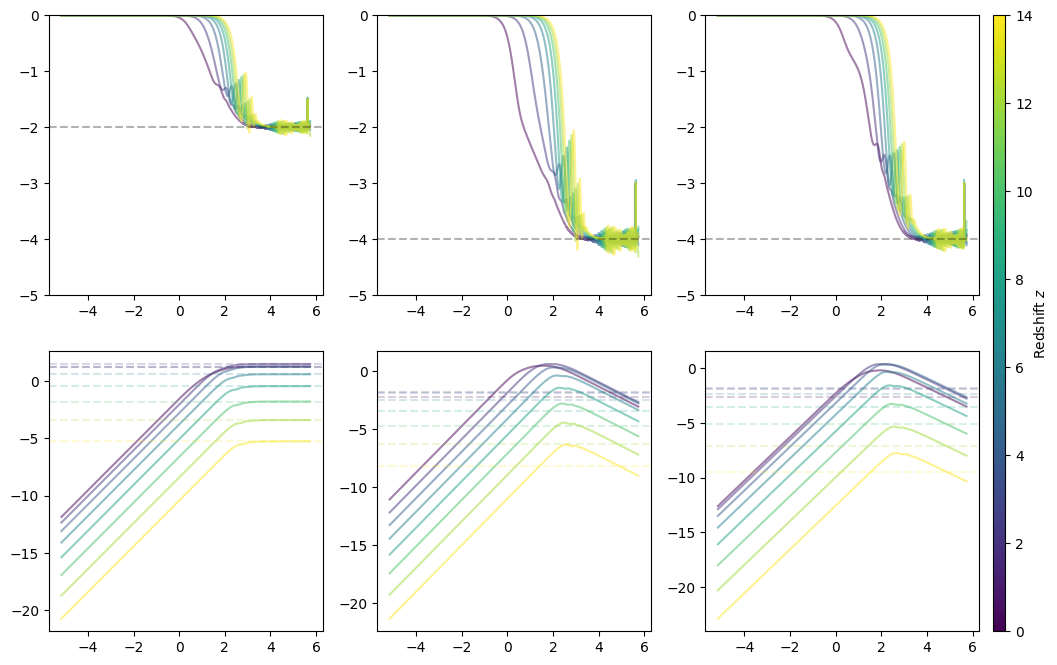

In [20]:
from halomod.bias import Tinker10
from scipy.signal import savgol_filter

def PS_1cs_1ss_2_terms(z, M_h_array, HMF_array, NCEN, NSAT, U_FT, bias):
    if U_FT is None:
        crit_dens_rescaled = (4/3*np.pi*cosmo.critical_density(z).value*200*2e40)
        U_FT = np.array([HOD.u_FT(k, M_h_array, z, crit_dens_rescaled) for k in hmf_k])
    PS1cs = np.trapz(HMF_array * NCEN * NSAT * U_FT, M_h_array) * 2
    PS1ss = np.trapz(HMF_array * NSAT * NSAT * U_FT * U_FT, M_h_array) * 1
    PS_2h = np.power(np.trapz((NCEN + NSAT) * HMF_array * bias * U_FT, M_h_array), 2)
    return np.array([PS1cs, PS1ss, PS_2h])

fig, ax = plt.subplots(2, 3, figsize=(12, 8), sharex=False, sharey=False)
z_display = np.array([0.1, 2, 4, 6, 8, 10, 12, 14])
color = iter(cm.viridis(np.linspace(0,1,len(z_display))))
meanC_P_1cs, meanC_P_1ss, meanC_P_2h = np.zeros(0), np.zeros(0), np.zeros(0)
for z in tqdm(z_display):
    M_h_array, HMF_array, hmf_nu, hmf_k, hmf_PS = HOD.init_lookup_table(z,
                                                                    PRECOMP_UFT = False,
                                                                    REWRITE_TBLS = False,
                                                                    LOW_RES = True)
    NCEN = HOD.N_cen(M_h_array, M_min, sigma_logM)
    NSAT = HOD.N_sat(M_h_array, M_sat, alpha, M_min, sigma_logM)
    crit_dens_rescaled = (4/3*np.pi*cosmo.critical_density(z).value*200*2e40)
    bias = Tinker10(nu=hmf_nu).bias()
    P_1cs, P_1ss, PS_2h = PS_1cs_1ss_2_terms(z, M_h_array, HMF_array, NCEN, NSAT, None, bias)
    d_P_1cs = np.nan_to_num(np.gradient(savgol_filter(np.log10(P_1cs), 250, 5), np.log10(hmf_k)))
    d_P_1ss = np.nan_to_num(np.gradient(savgol_filter(np.log10(P_1ss), 250, 5), np.log10(hmf_k)))
    d_P_2h  = np.nan_to_num(np.gradient(savgol_filter(np.log10(PS_2h), 250, 5), np.log10(hmf_k)))
    C_P_1cs = np.nan_to_num(np.append(np.zeros(1), np.sqrt(savgol_filter(P_1cs[:-1], 250, 5)*savgol_filter(P_1cs[1:] , 250, 5)/
                                    np.power((hmf_k[:-1]*hmf_k[1:]), -2))))
    C_P_1ss = np.nan_to_num(np.append(np.zeros(1), np.sqrt(savgol_filter(P_1ss[:-1], 250, 5)*savgol_filter(P_1cs[1:] , 250, 5)/
                                    np.power((hmf_k[:-1]*hmf_k[1:]), -2))))
    C_P_2h  = np.nan_to_num(np.append(np.zeros(1), np.sqrt(savgol_filter(PS_2h[:-1], 250, 5)*savgol_filter(P_1cs[1:] , 250, 5)/
                                    np.power((hmf_k[:-1]*hmf_k[1:]), -2))))
    meanC_P_1cs = np.append(meanC_P_1cs, np.mean(np.log10(C_P_1cs[hmf_k>1e4])))
    meanC_P_1ss = np.append(meanC_P_1ss, np.mean(np.log10(C_P_1ss[hmf_k>1e4])))
    meanC_P_2h  = np.append(meanC_P_2h,  np.mean(np.log10(C_P_2h[hmf_k>1e4] )))

    _col = next(color)
    ax[0, 0].plot(np.log10(hmf_k), d_P_1cs, color=_col, alpha = 0.5)
    ax[0, 1].plot(np.log10(hmf_k), d_P_1ss, color=_col, alpha = 0.5)
    ax[0, 2].plot(np.log10(hmf_k), d_P_2h,  color=_col, alpha = 0.5)
    ax[1, 0].plot(np.log10(hmf_k), np.log10(C_P_1cs), color=_col, alpha = 0.5)
    ax[1, 1].plot(np.log10(hmf_k), np.log10(C_P_1ss), color=_col, alpha = 0.5)
    ax[1, 2].plot(np.log10(hmf_k), np.log10(C_P_2h),  color=_col, alpha = 0.5)
    ax[1, 0].axhline(np.mean(np.log10(C_P_1cs[hmf_k>1e4])), c=_col, ls='--', alpha=0.2)
    ax[1, 1].axhline(np.mean(np.log10(C_P_1ss[hmf_k>1e4])), c=_col, ls='--', alpha=0.2)
    ax[1, 2].axhline(np.mean(np.log10(C_P_2h[hmf_k>1e4] )), c=_col, ls='--', alpha=0.2)

ax[0, 0].axhline(-2, c='k', ls='--', alpha=0.3)
ax[0, 1].axhline(-4, c='k', ls='--', alpha=0.3)
ax[0, 2].axhline(-4, c='k', ls='--', alpha=0.3)
ax[0, 0].set_ylim((-5, 0))
ax[0, 1].set_ylim((-5, 0))
ax[0, 2].set_ylim((-5, 0))
# ax[1, 0].set_ylim((-5, 0))
# ax[1, 1].set_ylim((-5, 0))
# ax[1, 2].set_ylim((-5, 0))
p0 = ax[0,1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([0.912, 0.11, 0.01, 0.77])
norm = NormColor(vmin=np.min(z_display*0),vmax=np.max(z_display))
s_m = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
s_m.set_array([])
cbar = plt.colorbar(s_m, cax=ax_cbar)
cbar.set_label(r'Redshift $z$', labelpad=0)
plt.show()


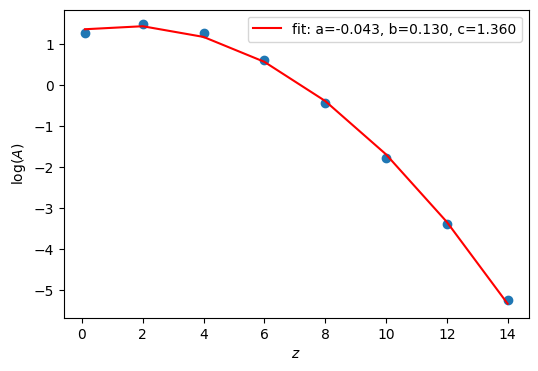

In [27]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * x*x + b * x + c

popt, pcov = curve_fit(func, z_display, meanC_P_1cs)

fig, ax = plt.subplots(1,1, figsize=(6, 4), sharex=False, sharey=False)
ax.scatter(z_display, meanC_P_1cs)
plt.plot(z_display, func(z_display, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$\log(A)$')
plt.legend()
plt.show()



In [62]:
from scipy import special

def integral_P1gsJzero_from_largek(k_min, z, comoving_distance_z, theta_rad):
    # r = comoving_distance_z
    # theta = theta_arcsec/206265
    a, b, c = -0.04346161,  0.13011286,  1.35990887 # from P_1cs fit
    A = np.power(10, a * z*z + b * z + c)
    y = k_min/(comoving_distance_z*theta_rad)
    pre = comoving_distance_z*theta_rad/(2*np.pi)/2
    fir = (-np.pi*y**2*special.struve(1, y)+2*y*y+2)*special.jv(0, y)/y
    sec = (np.pi*y*special.struve(0, y)-2)*special.jv(1, y)-2
    print(f' - y: {y:.1e}')
    print(f' --- pre: {pre:.1e}')
    print(f' --- fir: {fir:.1e}')
    print(f' --- sec: {sec:.1e}')
    return A * pre * (fir + sec)

z = 8
theta_arcsec = 5
comoving_distance_z = cosmo.comoving_distance(z).value
integral_P1gsJzero_from_largek(1e4, z, comoving_distance_z, theta_arcsec/206265)


 - y: 4.5e+04
 --- pre: 1.8e-02
 --- fir: 1.9e+00
 --- sec: -1.9e+00


-6.728201429518144e-15

In [51]:
M_h_array, HMF_array, hmf_nu, hmf_k, hmf_PS = HOD.init_lookup_table(0,
                                                                    PRECOMP_UFT = False,
                                                                    REWRITE_TBLS = False,
                                                                    LOW_RES = True,
                                                                    M_DM_min = 1e10, M_DM_max = np.inf)
P_1cs, P_1ss, PS_2h = PS_1cs_1ss_2_terms(z, M_h_array, HMF_array, NCEN, NSAT, U_FT, bias)
Bessel = np.array([special.j0(_x) for _x in hmf_k])
BesseY = np.array([special.y0(_x) for _x in hmf_k])
B_envl = np.sqrt(np.power(Bessel, 2) + np.power(BesseY, 2))
x1, x2 = hmf_k[-4000], hmf_k[-1000]
z1, z2 = P_1cs[-4000] * x1 * B_envl[-4000], P_1cs[-1000] * x2 * B_envl[-1000]
print(f'lim for large k of P1_cs slope: {(np.log10(z2)-np.log10(z1))/(np.log10(x2)-np.log10(x1)):.2f}')
z1, z2 = P_1ss[-4000] * x1 * B_envl[-4000], P_1ss[-1000] * x2 * B_envl[-1000]
print(f'lim for large k of P1_ss slope: {(np.log10(z2)-np.log10(z1))/(np.log10(x2)-np.log10(x1)):.2f}')
z1, z2 = PS_2h[-4000] * x1 * B_envl[-4000], PS_2h[-1000] * x2 * B_envl[-1000]
print(f'lim for large k of PS_2h slope: {(np.log10(z2)-np.log10(z1))/(np.log10(x2)-np.log10(x1)):.2f}')

lim for large k of P1_cs slope: -1.50
lim for large k of P1_ss slope: -3.50
lim for large k of PS_2h slope: -3.49


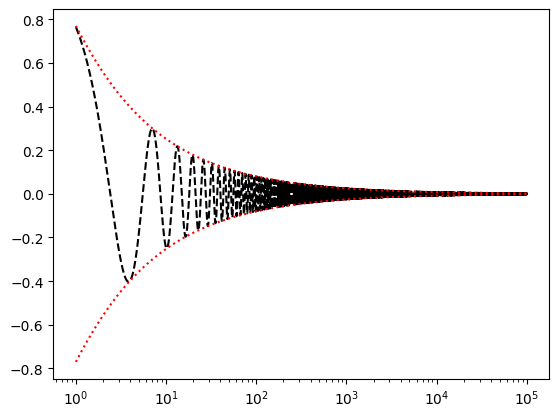

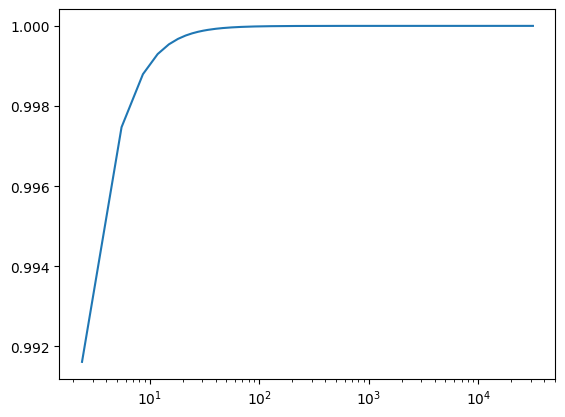

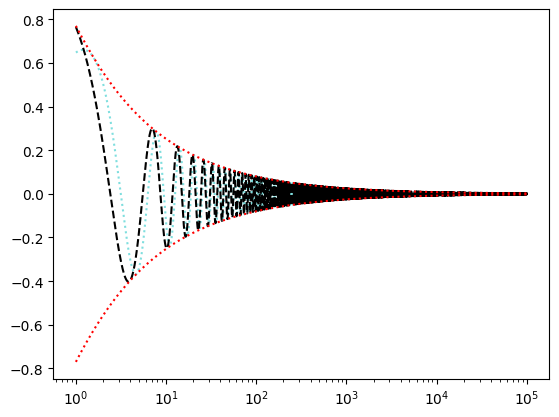

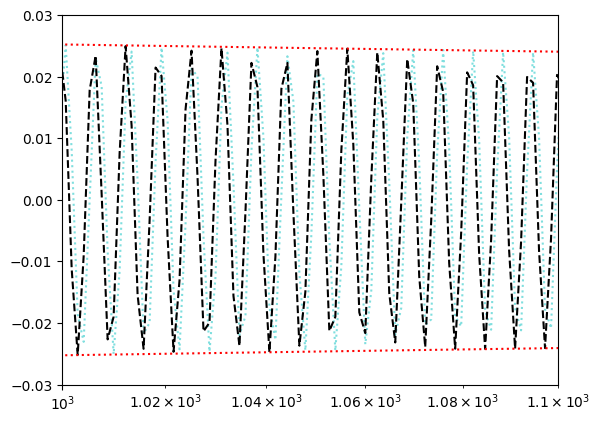

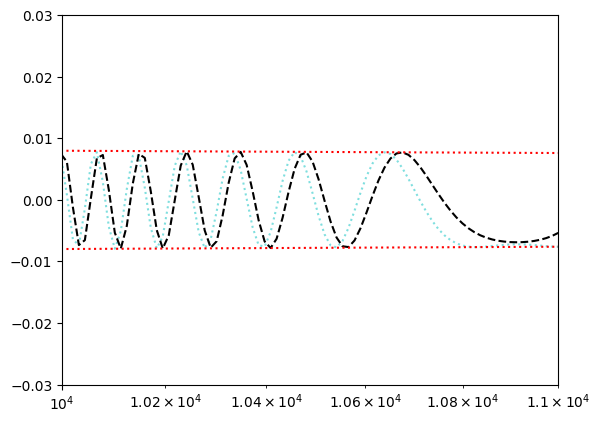

In [74]:
# z = 10
# comoving_distance_z = cosmo.comoving_distance(z).value
# M_h_array, HMF_array, hmf_nu, hmf_k, hmf_PS = HOD.init_lookup_table(z,
#                                                                     PRECOMP_UFT = False,
#                                                                     REWRITE_TBLS = False,
#                                                                     LOW_RES = True,
#                                                                     M_DM_min = 1e10, M_DM_max = np.inf)
# Bessel = np.array([special.j0(k*1/206265*comoving_distance_z) for k in hmf_k])
# BesseY = np.array([special.y0(k*1/206265*comoving_distance_z) for k in hmf_k])
# B_envl = np.sqrt(np.power(Bessel, 2) + np.power(BesseY, 2))

x = np.logspace(0,5,10_000)
Bessel = np.array([special.j0(_x) for _x in x])
BesseY = np.array([special.y0(_x) for _x in x])
B_envl = np.sqrt(np.power(Bessel, 2) + np.power(BesseY, 2))
plt.plot(x, Bessel, 'k--')
plt.plot(x, B_envl, 'r:')
plt.plot(x, -B_envl, 'r:')
plt.xscale('log')
plt.show()
# plt.yscale('log')

j0zeros = special.jn_zeros(0, 10_000)
plt.plot(j0zeros[:-1], np.diff(j0zeros)/np.pi)
plt.xscale('log')
plt.show()

plt.plot(x, B_envl*np.sin(x), 'c:', alpha=0.5)
plt.plot(x, Bessel, 'k--')
plt.plot(x, B_envl, 'r:')
plt.plot(x, -B_envl, 'r:')
plt.xscale('log')
plt.show()

plt.plot(x, B_envl*np.sin(x), 'c:', alpha=0.5)
plt.plot(x, Bessel, 'k--')
plt.plot(x, B_envl, 'r:')
plt.plot(x, -B_envl, 'r:')
plt.xscale('log')
plt.xlim((1e3, 1.1e3))
plt.ylim((-0.03, 0.03))
plt.show()

plt.plot(x, B_envl*np.sin(x), 'c:', alpha=0.5)
plt.plot(x, Bessel, 'k--')
plt.plot(x, B_envl, 'r:')
plt.plot(x, -B_envl, 'r:')
plt.xscale('log')
plt.xlim((1e4, 1.1e4))
plt.ylim((-0.03, 0.03))
plt.show()

In [8]:
M_sat, M_min, sigma_logM, alpha = 10**13.1, 10**13.0, 0.2, 1.0
th_arr = np.logspace(-0.5, 3.5, 21)
LR, _REWR = 1, 0
z = 1
data = [(z-0.2, 1/3),(z, 1/3),(z+0.2, 1/3)]
z_array, N_z_nrm = np.array(data).T
o1_1, o2_1 = HOD.omega(th_arr/206265, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, LOW_RES=LR, REWRITE_TBLS=_REWR)
print(z)
z = 3
data = [(z-0.2, 1/3),(z, 1/3),(z+0.2, 1/3)]
z_array, N_z_nrm = np.array(data).T
o1_3, o2_3 = HOD.omega(th_arr/206265, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, LOW_RES=LR, REWRITE_TBLS=_REWR)
print(z)
z = 5
data = [(z-0.2, 1/3),(z, 1/3),(z+0.2, 1/3)]
z_array, N_z_nrm = np.array(data).T
o1_5, o2_5 = HOD.omega(th_arr/206265, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, LOW_RES=LR, REWRITE_TBLS=_REWR)
print(z)
z = 7
data = [(z-0.2, 1/3),(z, 1/3),(z+0.2, 1/3)]
z_array, N_z_nrm = np.array(data).T
o1_7, o2_7 = HOD.omega(th_arr/206265, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, LOW_RES=LR, REWRITE_TBLS=_REWR)
print(z)
z = 9
data = [(z-0.2, 1/3),(z, 1/3),(z+0.2, 1/3)]
z_array, N_z_nrm = np.array(data).T
o1_9, o2_9 = HOD.omega(th_arr/206265, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, LOW_RES=LR, REWRITE_TBLS=_REWR)

Calculating HMF table at redshift 0.00
Calculating HMF table at redshift 1.20Calculating HMF table at redshift 1.00

Calculating HMF table at redshift 0.80
1
Calculating HMF table at redshift 0.00
Calculating HMF table at redshift 3.00
Calculating HMF table at redshift 2.80
Calculating HMF table at redshift 3.20
Caught kbd interrupt


SystemExit: 1

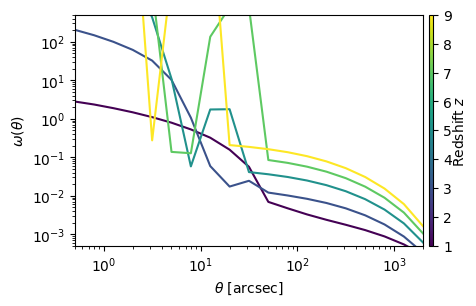

In [ ]:
SHOW_HALO_TERMS = 0
_color_ = iter(cm.viridis(np.linspace(0,1,5)))

_o1 = np.copy(o1_1)
_o3 = np.copy(o1_3)
_o5 = np.copy(o1_5)
_o7 = np.copy(o1_7)
_o9 = np.copy(o1_9)

_o1[_o1<0] = 0
_o3[_o3<0] = 0
_o5[_o5<0] = 0
_o7[_o7<0] = 0
_o9[_o9<0] = 0
_o1[th_arr>=50] = 0
_o3[th_arr>=50] = 0
_o5[th_arr>=50] = 0
_o7[th_arr>=50] = 0
_o9[th_arr>=50] = 0

fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
_col_ = next(_color_)
ax.plot(th_arr, _o1+o2_1, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _o1     , c = _col_, ls = '--', label=r'$\omega_{1h}$')
    ax.plot(th_arr, o2_1    , c = _col_, ls = '-.', label=r'$\omega_{2h}$')
    ax.plot(th_arr, o1_1    , c = _col_, ls = '--', alpha=0.25)

_col_ = next(_color_)
ax.plot(th_arr, _o3+o2_3, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _o3     , c = _col_, ls = '--')
    ax.plot(th_arr, o2_3    , c = _col_, ls = '-.')
    ax.plot(th_arr, o1_3    , c = _col_, ls = '--', alpha=0.25)

_col_ = next(_color_)
ax.plot(th_arr, _o5+o2_5, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _o5     , c = _col_, ls = '--')
    ax.plot(th_arr, o2_5    , c = _col_, ls = '-.')
    ax.plot(th_arr, o1_5    , c = _col_, ls = '--', alpha=0.25)

_col_ = next(_color_)
ax.plot(th_arr, _o7+o2_7, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _o7     , c = _col_, ls = '--')
    ax.plot(th_arr, o2_7    , c = _col_, ls = '-.')
    ax.plot(th_arr, o1_7    , c = _col_, ls = '--', alpha=0.25)

_col_ = next(_color_)
ax.plot(th_arr, _o9+o2_9, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _o9     , c = _col_, ls = '--')
    ax.plot(th_arr, o2_9    , c = _col_, ls = '-.')
    ax.plot(th_arr, o1_9    , c = _col_, ls = '--', alpha=0.25)

p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([0.912, 0.11, 0.01, 0.77])
norm = NormColor(vmin=1,vmax=9)
s_m = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
s_m.set_array([])
cbar = plt.colorbar(s_m, cax=ax_cbar)
cbar.set_label(r'Redshift $z$', labelpad=0)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.5,2e3))
ax.set_ylim((5e-4, 5e2))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
# plt.legend()
plt.show()

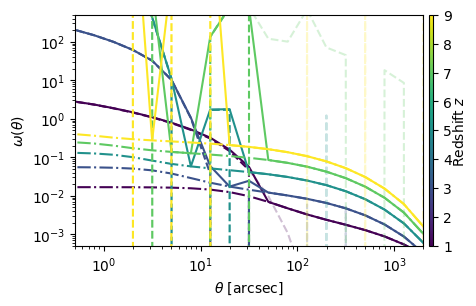

In [43]:
SHOW_HALO_TERMS = 1
_color_ = iter(cm.viridis(np.linspace(0,1,5)))

_o1 = np.copy(o1_1)
_o3 = np.copy(o1_3)
_o5 = np.copy(o1_5)
_o7 = np.copy(o1_7)
_o9 = np.copy(o1_9)

_o1[_o1<0] = 0
_o3[_o3<0] = 0
_o5[_o5<0] = 0
_o7[_o7<0] = 0
_o9[_o9<0] = 0
_o1[th_arr>=50] = 0
_o3[th_arr>=50] = 0
_o5[th_arr>=50] = 0
_o7[th_arr>=50] = 0
_o9[th_arr>=50] = 0

fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
_col_ = next(_color_)
ax.plot(th_arr, _o1+o2_1, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _o1     , c = _col_, ls = '--', label=r'$\omega_{1h}$')
    ax.plot(th_arr, o2_1    , c = _col_, ls = '-.', label=r'$\omega_{2h}$')
    ax.plot(th_arr, o1_1    , c = _col_, ls = '--', alpha=0.25)

_col_ = next(_color_)
ax.plot(th_arr, _o3+o2_3, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _o3     , c = _col_, ls = '--')
    ax.plot(th_arr, o2_3    , c = _col_, ls = '-.')
    ax.plot(th_arr, o1_3    , c = _col_, ls = '--', alpha=0.25)

_col_ = next(_color_)
ax.plot(th_arr, _o5+o2_5, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _o5     , c = _col_, ls = '--')
    ax.plot(th_arr, o2_5    , c = _col_, ls = '-.')
    ax.plot(th_arr, o1_5    , c = _col_, ls = '--', alpha=0.25)

_col_ = next(_color_)
ax.plot(th_arr, _o7+o2_7, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _o7     , c = _col_, ls = '--')
    ax.plot(th_arr, o2_7    , c = _col_, ls = '-.')
    ax.plot(th_arr, o1_7    , c = _col_, ls = '--', alpha=0.25)

_col_ = next(_color_)
ax.plot(th_arr, _o9+o2_9, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _o9     , c = _col_, ls = '--')
    ax.plot(th_arr, o2_9    , c = _col_, ls = '-.')
    ax.plot(th_arr, o1_9    , c = _col_, ls = '--', alpha=0.25)

p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([0.912, 0.11, 0.01, 0.77])
norm = NormColor(vmin=1,vmax=9)
s_m = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
s_m.set_array([])
cbar = plt.colorbar(s_m, cax=ax_cbar)
cbar.set_label(r'Redshift $z$', labelpad=0)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.5,2e3))
ax.set_ylim((5e-4, 5e2))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
# plt.legend()
plt.show()

In [ ]:
z = 7
data = [(z-0.2, 1/3),(z, 1/3),(z+0.2, 1/3)]
z_array, N_z_nrm = np.array(data).T

M_sat, M_min, sigma_logM, alpha = 10**12.0, 10**11.0, 0.2, 1.0
o1_A, o2_A = HOD.omega(th_arr/206265, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, REWRITE_TBLS=0)

M_sat, M_min, sigma_logM, alpha = 10**13.0, 10**11.0, 0.2, 1.0
o1_B, o2_B = HOD.omega(th_arr/206265, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, REWRITE_TBLS=0)

M_sat, M_min, sigma_logM, alpha = 10**14.0, 10**11.0, 0.2, 1.0
o1_C, o2_C = HOD.omega(th_arr/206265, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, REWRITE_TBLS=0)

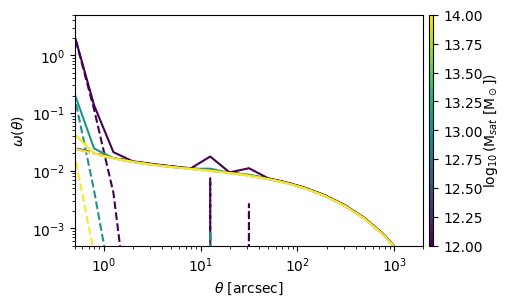

In [ ]:
SHOW_HALO_TERMS = 1
_color_ = iter(cm.viridis(np.linspace(0,1,3)))

_oA = np.copy(o1_A)
_oB = np.copy(o1_B)
_oC = np.copy(o1_C)

_oA[_oA<0] = 0
_oB[_oB<0] = 0
_oC[_oC<0] = 0
_oA[th_arr>=50] = 0
_oB[th_arr>=50] = 0
_oC[th_arr>=50] = 0


fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
_col_ = next(_color_)
ax.plot(th_arr, _oA+o2_A, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _oA     , c = _col_, ls = '--', label=r'$\omega_{1h}$')
    ax.plot(th_arr, o2_A    , c = _col_, ls = '-.', label=r'$\omega_{2h}$')
    # ax.plot(th_arr, o1_A    , c = _col_, ls = '--', alpha=0.25)

_col_ = next(_color_)
ax.plot(th_arr, _oB+o2_B, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _oB     , c = _col_, ls = '--')
    ax.plot(th_arr, o2_B    , c = _col_, ls = '-.')
    # ax.plot(th_arr, o1_B    , c = _col_, ls = '--', alpha=0.25)

_col_ = next(_color_)
ax.plot(th_arr, _oC+o2_C, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _oC     , c = _col_, ls = '--')
    ax.plot(th_arr, o2_C    , c = _col_, ls = '-.')
    # ax.plot(th_arr, o1_C    , c = _col_, ls = '--', alpha=0.25)

p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([0.912, 0.11, 0.01, 0.77])
norm = NormColor(vmin=12,vmax=14)
s_m = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
s_m.set_array([])
cbar = plt.colorbar(s_m, cax=ax_cbar)
cbar.set_label(r'$\log_{10}$(M$_{sat}$ [M$_\odot$])', labelpad=0)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.5,2e3))
ax.set_ylim((5e-4, 5))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
# plt.legend()
plt.show()

In [ ]:
z = 5
data = [(z-0.2, 1/3),(z, 1/3),(z+0.2, 1/3)]
z_array, N_z_nrm = np.array(data).T

M_sat, M_min, sigma_logM, alpha = 10**14.0, 10**11.0, 0.2, 1.0
o1_Y, o2_Y = HOD.omega(th_arr/206265, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, REWRITE_TBLS=0)

M_sat, M_min, sigma_logM, alpha = 10**14.0, 10**12.0, 0.2, 1.0
o1_X, o2_X = HOD.omega(th_arr/206265, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, REWRITE_TBLS=0)

M_sat, M_min, sigma_logM, alpha = 10**14.0, 10**13.0, 0.2, 1.0
o1_Z, o2_Z = HOD.omega(th_arr/206265, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, REWRITE_TBLS=0)

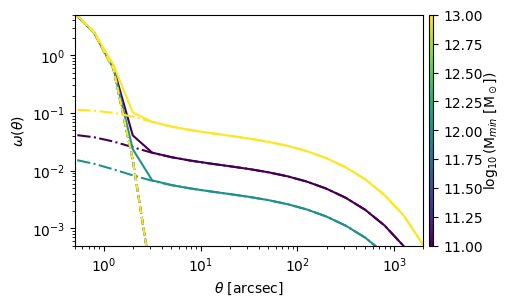

In [ ]:
SHOW_HALO_TERMS = 1
_color_ = iter(cm.viridis(np.linspace(0,1,3)))

_oX = np.copy(o1_X)
_oY = np.copy(o1_X)
_oZ = np.copy(o1_X)

_oX[_oX<0] = 0
_oY[_oY<0] = 0
_oZ[_oZ<0] = 0
_oX[th_arr>=50] = 0
_oY[th_arr>=50] = 0
_oZ[th_arr>=50] = 0


fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
_col_ = next(_color_)
ax.plot(th_arr, _oX+o2_X, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _oX     , c = _col_, ls = '--', label=r'$\omega_{1h}$')
    ax.plot(th_arr, o2_X    , c = _col_, ls = '-.', label=r'$\omega_{2h}$')
    # ax.plot(th_arr, o1_X    , c = _col_, ls = '--', alpha=0.25)

_col_ = next(_color_)
ax.plot(th_arr, _oX+o2_Y, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _oY     , c = _col_, ls = '--')
    ax.plot(th_arr, o2_Y    , c = _col_, ls = '-.')
    # ax.plot(th_arr, o1_Y    , c = _col_, ls = '--', alpha=0.25)

_col_ = next(_color_)
ax.plot(th_arr, _oZ+o2_Z, c = _col_, ls = '-')
if SHOW_HALO_TERMS:
    ax.plot(th_arr, _oZ     , c = _col_, ls = '--')
    ax.plot(th_arr, o2_Z    , c = _col_, ls = '-.')
    # ax.plot(th_arr, o1_Z    , c = _col_, ls = '--', alpha=0.25)

p0 = ax.get_position().get_points().flatten()
ax_cbar = fig.add_axes([0.912, 0.11, 0.01, 0.77])
norm = NormColor(vmin=11,vmax=13)
s_m = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
s_m.set_array([])
cbar = plt.colorbar(s_m, cax=ax_cbar)
cbar.set_label(r'$\log_{10}$(M$_{min}$ [M$_\odot$])', labelpad=0)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.5,2e3))
ax.set_ylim((5e-4, 5))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
# plt.legend()

plt.show()

In [2]:
M_sat, M_min, sigma_logM, alpha = 10**12, 10**11.2, 0.2, 1.0
HIGH_RES = 0

zz = np.array([5.    , 5.2475, 5.495 , 5.7425, 5.99  ])
z_array = (zz[:-1] + zz[1:]) / 2
N = np.array([448, 451, 641, 535])
w_obs = np.array([1.62159772, 0.37306552, 0.14413575, 0.17384627, 0.14877287, 0.10469127, 0.07389844, 0.06610705, 0.04405596, 0.03900939])
w_err = np.array([0.52663385, 0.13507835, 0.06413887, 0.06794559, 0.0229982 , 0.02041773, 0.00789723, 0.00806796, 0.00878693, 0.00962475])

bin_centre = np.array([1.3977544 ,   2.42791058,   4.23306435,   7.33872431, 12.74758672,
                        22.14320549,  38.43186415,  66.63374299,115.39951339, 198.93851897])
# plt.errorbar(bin_centre,w_obs, w_err, c='b')

N_norm = N / (np.sum(N) * np.diff(zz)[0])
t_Nico = bin_centre/206265

th_arr = np.logspace(-0.5, 3.5, 11)/206265
o1_N, o2_N = HOD.omega(th_arr, M_min, sigma_logM, M_sat, alpha, N_norm, z_array,
                       REWRITE_TBLS=0, LOW_RES=(not HIGH_RES), VERBOSE = 0, mag_min = -22.3, mag_max = -15.5)

SHOW_HALO_TERMS = 1
_oN = np.copy(o1_N)
_oN[_oN<0] = 0
_oN[th_arr>=35/206265] = 0
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
ax.plot(th_arr*206265, _oN+o2_N, c = 'r', ls = '-', label='Model')
if SHOW_HALO_TERMS:
    ax.plot(th_arr*206265, o1_N    , c = 'r', ls = '--', alpha = 0.3, label=r'$\omega_{1h}$')
    ax.plot(th_arr*206265, o2_N    , c = 'r', ls = '-.', alpha = 0.3, label=r'$\omega_{2h}$')

##########################################################################################
o1_N, o2_N = HOD.omega(th_arr, M_min, sigma_logM, M_sat, alpha, N_norm, z_array,
                       REWRITE_TBLS=0, LOW_RES=(not HIGH_RES), VERBOSE = 0)
SHOW_HALO_TERMS = 1
_oN = np.copy(o1_N)
_oN[_oN<0] = 0
_oN[th_arr>=35/206265] = 0
ax.plot(th_arr*206265, _oN+o2_N, c = 'c', ls = '-', label='Model (all M_dm)')
if SHOW_HALO_TERMS:
    ax.plot(th_arr*206265, o1_N    , c = 'c', ls = '--', alpha = 0.3)
    ax.plot(th_arr*206265, o2_N    , c = 'c', ls = '-.', alpha = 0.3)
##########################################################################################
ax.errorbar(bin_centre,w_obs, w_err, c='b', label='Nico data')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.5,2e3))
ax.set_ylim((1e-2, 1e1))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
plt.legend()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 12550 but corresponding boolean dimension is 10550

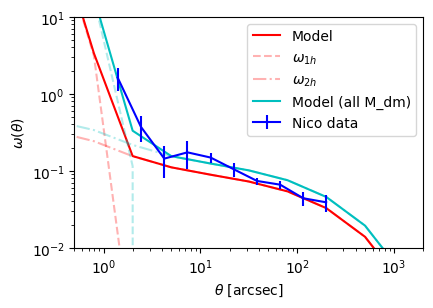

In [10]:
M_sat, M_min, sigma_logM, alpha = 10**12, 10**11.2, 0.2, 1.0
HIGH_RES = 1

zz = np.array([5.    , 5.2475, 5.495 , 5.7425, 5.99  ])
z_array = (zz[:-1] + zz[1:]) / 2
N = np.array([448, 451, 641, 535])
w_obs = np.array([1.62159772, 0.37306552, 0.14413575, 0.17384627, 0.14877287, 0.10469127, 0.07389844, 0.06610705, 0.04405596, 0.03900939])
w_err = np.array([0.52663385, 0.13507835, 0.06413887, 0.06794559, 0.0229982 , 0.02041773, 0.00789723, 0.00806796, 0.00878693, 0.00962475])

bin_centre = np.array([1.3977544 ,   2.42791058,   4.23306435,   7.33872431, 12.74758672,
                        22.14320549,  38.43186415,  66.63374299,115.39951339, 198.93851897])
# plt.errorbar(bin_centre,w_obs, w_err, c='b')

N_norm = N / (np.sum(N) * np.diff(zz)[0])
t_Nico = bin_centre/206265

th_arr = np.logspace(-0.5, 3.5, 11)/206265
o1_N, o2_N = HOD.omega(th_arr, M_min, sigma_logM, M_sat, alpha, N_norm, z_array,
                       REWRITE_TBLS=0, LOW_RES=(not HIGH_RES), VERBOSE = 0, mag_min = -22.3, mag_max = -15.5)

SHOW_HALO_TERMS = 1
_oN = np.copy(o1_N)
_oN[_oN<0] = 0
_oN[th_arr>=35/206265] = 0
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
ax.plot(th_arr*206265, _oN+o2_N, c = 'r', ls = '-', label='Model')
if SHOW_HALO_TERMS:
    ax.plot(th_arr*206265, o1_N    , c = 'r', ls = '--', alpha = 0.3, label=r'$\omega_{1h}$')
    ax.plot(th_arr*206265, o2_N    , c = 'r', ls = '-.', alpha = 0.3, label=r'$\omega_{2h}$')

##########################################################################################
o1_N, o2_N = HOD.omega(th_arr, M_min, sigma_logM, M_sat, alpha, N_norm, z_array,
                       REWRITE_TBLS=0, LOW_RES=(not HIGH_RES), VERBOSE = 0)
SHOW_HALO_TERMS = 1
_oN = np.copy(o1_N)
_oN[_oN<0] = 0
_oN[th_arr>=35/206265] = 0
ax.plot(th_arr*206265, _oN+o2_N, c = 'c', ls = '-', label='Model (all M_dm)')
if SHOW_HALO_TERMS:
    ax.plot(th_arr*206265, o1_N    , c = 'c', ls = '--', alpha = 0.3)
    ax.plot(th_arr*206265, o2_N    , c = 'c', ls = '-.', alpha = 0.3)
##########################################################################################
ax.errorbar(bin_centre,w_obs, w_err, c='b', label='Nico data')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.5,2e3))
ax.set_ylim((1e-2, 1e1))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
plt.legend()
plt.show()

########################
ACF_new_parameters_z5.5.txt
########################


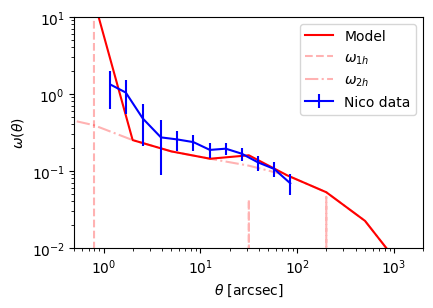

########################
ACF_new_parameters_z6.5.txt
########################


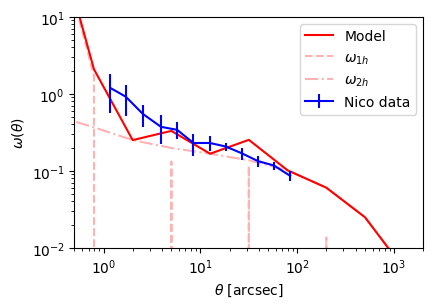

########################
ACF_new_parameters_z7.4.txt
########################


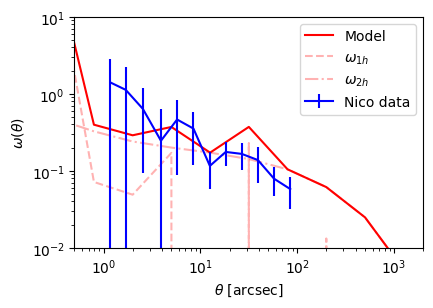

########################
ACF_new_parameters_z8.5.txt
########################


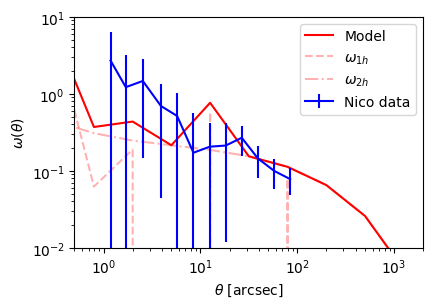

########################
ACF_new_parameters_z9.3.txt
########################


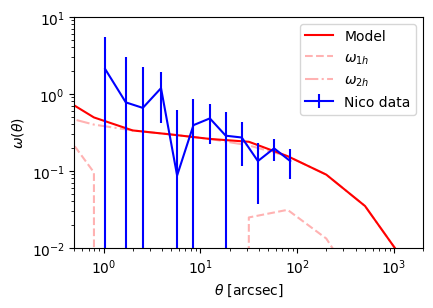

########################
ACF_new_parameters_z11.5.txt
########################


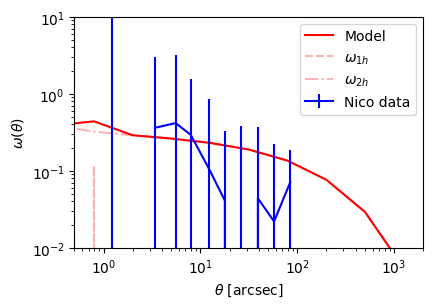

In [5]:
### Fit 2 halo ###
M_sat, M_min, sigma_logM, alpha = 10**11.5, 10**10.5, 0.2, 1.0
SHOW_HALO_TERMS = 1

def read_Nico_data(fname):
    data = pd.read_csv(fname, sep=' ')
    bin_centre = data['theta_bin'].to_numpy()
    w_obs = data['w_theta'].to_numpy()
    w_err = data['err_w_theta'].to_numpy()
    z_array = data['z_array'].to_numpy()
    Nz = data['Nz'].to_numpy()
    z_array, Nz = z_array[z_array>0], Nz[z_array>0]
    N_norm = Nz / (np.sum(Nz) * np.diff(z_array)[0])
    return bin_centre, w_obs, w_err, z_array, N_norm

fnames = ['ACF_new_parameters_z5.5.txt',
          'ACF_new_parameters_z6.5.txt',
          'ACF_new_parameters_z7.4.txt',
          'ACF_new_parameters_z8.5.txt',
          'ACF_new_parameters_z9.3.txt',
        #   'ACF_new_parameters_z10.6.txt',
          'ACF_new_parameters_z11.5.txt']

for fname, M_min, M_sat in zip(fnames,
                               np.power(10, np.array([11.25, 11.00, 10.75, 10.50, 10.25, 10.00])),
                               np.power(10, np.array([12.25, 12.20, 12.15, 12.10, 12.05, 12.00]))):
    print('########################')
    print(fname)
    print('########################')
    bin_centre, w_obs, w_err, z_array, N_norm = read_Nico_data('Data_Nico/'+fname)
    t_Nico = bin_centre/206265
    th_arr = np.logspace(-0.5, 3.5, 11)/206265
    o1_N, o2_N = HOD.omega(th_arr, M_min, sigma_logM, M_sat, alpha, N_norm, z_array, REWRITE_TBLS=0, LOW_RES=1, INTERPOLATION = True)
    _oN = np.copy(o1_N)
    _oN[_oN<0] = 0
    _oN[th_arr>=35/206265] = 0
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
    ax.plot(th_arr*206265, _oN+o2_N, c = 'r', ls = '-', label='Model')
    # ax.plot(th_arr*206265, o2_N, c = 'r', ls = '-', label='Model')
    if SHOW_HALO_TERMS:
        ax.plot(th_arr*206265, o1_N    , c = 'r', ls = '--', alpha = 0.3, label=r'$\omega_{1h}$')
        ax.plot(th_arr*206265, o2_N    , c = 'r', ls = '-.', alpha = 0.3, label=r'$\omega_{2h}$')
    ax.errorbar(bin_centre,w_obs, w_err, c='b', label='Nico data')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim((0.5,2e3))
    ax.set_ylim((1e-2, 1e1))
    ax.set_xlabel(r'$\theta$ [arcsec]')
    ax.set_ylabel(r'$\omega$($\theta$)')
    plt.legend()
    plt.show()

########################
ACF_new_parameters_z5.5.txt
########################


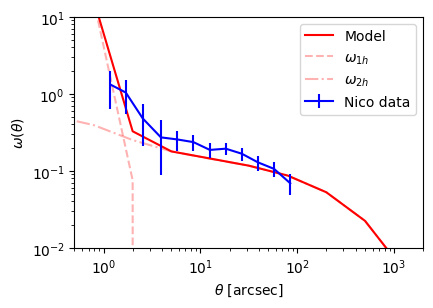

########################
ACF_new_parameters_z6.5.txt
########################


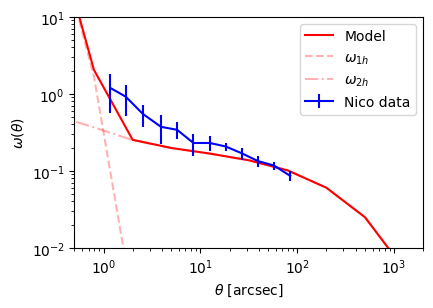

########################
ACF_new_parameters_z7.4.txt
########################


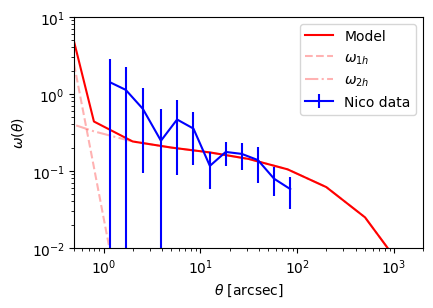

########################
ACF_new_parameters_z8.5.txt
########################


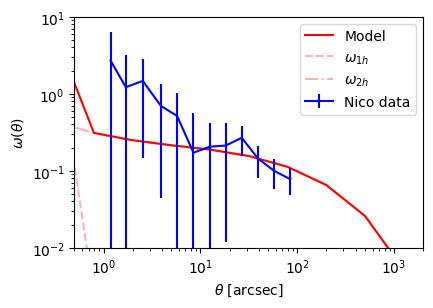

########################
ACF_new_parameters_z9.3.txt
########################


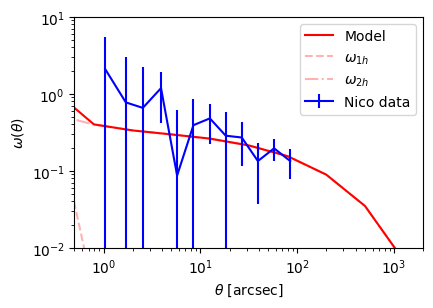

########################
ACF_new_parameters_z11.5.txt
########################


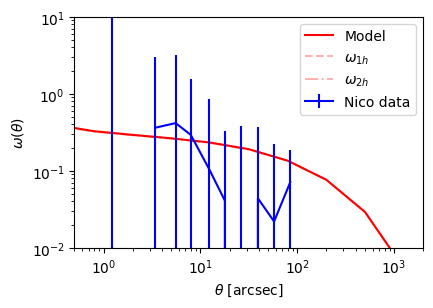

In [6]:
M_sat, M_min, sigma_logM, alpha = 10**12.5, 10**11.2, 0.2, 1.0

def read_Nico_data(fname):
    data = pd.read_csv(fname, sep=' ')
    bin_centre = data['theta_bin'].to_numpy()
    w_obs = data['w_theta'].to_numpy()
    w_err = data['err_w_theta'].to_numpy()
    z_array = data['z_array'].to_numpy()
    Nz = data['Nz'].to_numpy()
    z_array, Nz = z_array[z_array>0], Nz[z_array>0]
    N_norm = Nz / (np.sum(Nz) * np.diff(z_array)[0])
    return bin_centre, w_obs, w_err, z_array, N_norm

fnames = ['ACF_new_parameters_z5.5.txt',
          'ACF_new_parameters_z6.5.txt',
          'ACF_new_parameters_z7.4.txt',
          'ACF_new_parameters_z8.5.txt',
          'ACF_new_parameters_z9.3.txt',
        #   'ACF_new_parameters_z10.6.txt',
          'ACF_new_parameters_z11.5.txt']

for fname, M_min, M_sat in zip(fnames,
                               np.power(10, np.array([11.25, 11.00, 10.75, 10.50, 10.25, 10.00])),
                               np.power(10, np.array([12.25, 12.20, 12.15, 12.10, 12.05, 12.00]))):
    print('########################')
    print(fname)
    print('########################')
    bin_centre, w_obs, w_err, z_array, N_norm = read_Nico_data('Data_Nico/'+fname)
    t_Nico = bin_centre/206265
    th_arr = np.logspace(-0.5, 3.5, 11)/206265
    o1_N, o2_N = HOD.omega(th_arr, M_min, sigma_logM, M_sat, alpha, N_norm, z_array, REWRITE_TBLS=0, LOW_RES=0)
    SHOW_HALO_TERMS = 1
    _oN = np.copy(o1_N)
    _oN[_oN<0] = 0
    _oN[th_arr>=35/206265] = 0
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
    ax.plot(th_arr*206265, _oN+o2_N, c = 'r', ls = '-', label='Model')
    if SHOW_HALO_TERMS:
        ax.plot(th_arr*206265, o1_N    , c = 'r', ls = '--', alpha = 0.3, label=r'$\omega_{1h}$')
        ax.plot(th_arr*206265, o2_N    , c = 'r', ls = '-.', alpha = 0.3, label=r'$\omega_{2h}$')
    ax.errorbar(bin_centre,w_obs, w_err, c='b', label='Nico data')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim((0.5,2e3))
    ax.set_ylim((1e-2, 1e1))
    ax.set_xlabel(r'$\theta$ [arcsec]')
    ax.set_ylabel(r'$\omega$($\theta$)')
    plt.legend()
    plt.show()

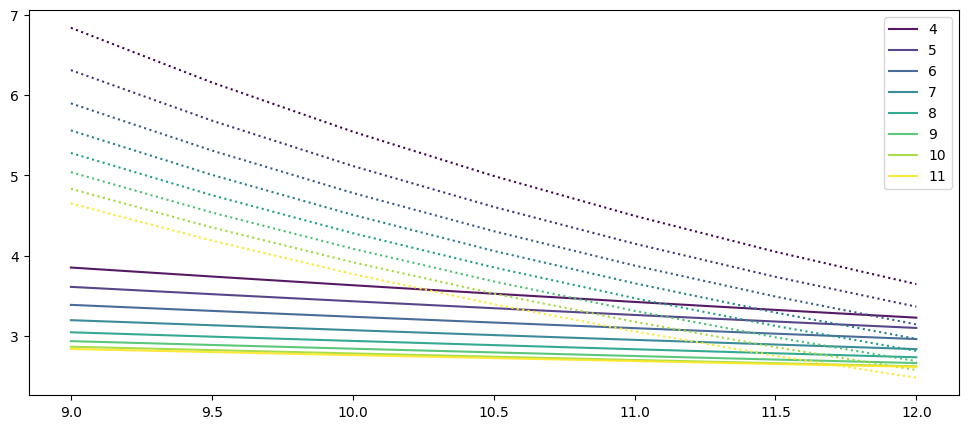

In [3]:
z_array = np.arange(4,12,1)
fig, ax = plt.subplots(1, 1, figsize=(12, 5), sharex=False, sharey=False)
for z, col in zip(z_array, cm.viridis(np.linspace(0,1,len(z_array)))):
    MHARR = np.linspace(9,12,7)
    ax.plot(MHARR, HOD.get_c_from_M_h(np.power(10, MHARR), z, model='Correa'), color=col, label=str(z), alpha= 0.9)
    ax.plot(MHARR, HOD.get_c_from_M_h(np.power(10, MHARR), z, model='Duffy'), color=col, ls = ':')
plt.legend()
plt.show()

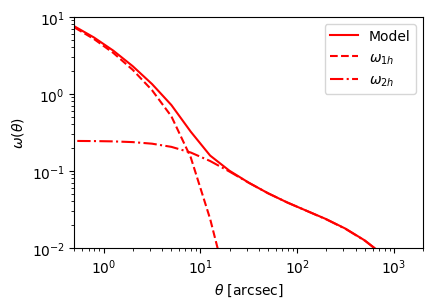

In [27]:
z = 1.7
M_sat, M_min, sigma_logM, alpha = 10**14.18, 10**12.46, 0.2, 1.0
z_array = np.array([1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1])
N_z_nrm = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

th_arr = np.logspace(-0.5, 3.5, 21)
o1_N, o2_N = HOD.omega(th_arr/206265, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, PRECOMP_UFT = 0, REWRITE_TBLS=0)

fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
ax.plot(th_arr, o1_N+o2_N, c = 'r', ls = '-', label='Model')
if 1:
    ax.plot(th_arr, o1_N, c = 'r', ls = '--', label=r'$\omega_{1h}$')
    ax.plot(th_arr, o2_N, c = 'r', ls = '-.', label=r'$\omega_{2h}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.5,2e3))
ax.set_ylim((1e-2, 1e1))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
plt.legend()

plt.show()

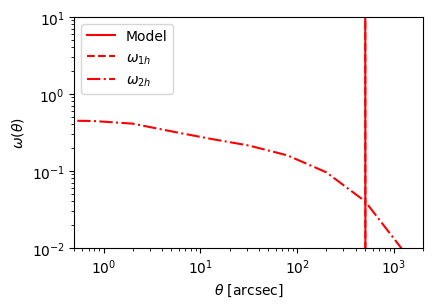

In [32]:
z = 5.9
M_sat, M_min, sigma_logM, alpha = 10**12.33, 10**14.67, 0.2, 1.0
data = [
(5.600000e+00, 5.490270e-02),
(5.700000e+00, 1.665790e-01),
(5.800000e+00, 1.496540e-01),
(5.900000e+00, 2.093970e-01),
(6.000000e+00, 1.870710e-01),
(6.100000e+00, 2.388520e-01),
(6.200000e+00, 1.615760e-01),
(6.300000e+00, 2.964280e-02),
]
z_array, N_z_nrm = np.array(data).T

th_arr = np.logspace(-0.5, 3.5, 11)
o1_N, o2_N = HOD.omega(th_arr/206265, M_min, sigma_logM, M_sat, alpha, N_z_nrm/np.sum(N_z_nrm), z_array)

fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
ax.plot(th_arr, o1_N+o2_N, c = 'r', ls = '-', label='Model')
if 1:
    ax.plot(th_arr, o1_N     , c = 'r', ls = '--', label=r'$\omega_{1h}$')
    ax.plot(th_arr, o2_N    , c = 'r', ls = '-.', label=r'$\omega_{2h}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.5,2e3))
ax.set_ylim((1e-2, 1e1))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
plt.legend()
plt.show()

In [2]:
_INTRP, _REWR, _LRES = 0, 0, 0
sigma_logM, alpha = 0.2, 1.0

M_min, M_sat = 10**13.3, 10**14.
print('Calc z=5.5')
### Nico z = 5.5 ###
z_N_z5 = 5.5 #z_bin = [5,6)
M_DM_min_z5, M_DM_max_z5 = 10**9.5, 10**15

w_N_z5 = np.array([1.92708707, 0.65977111, 0.42943433, 0.06414944,
    0.23705789, 0.20410338, 0.1759323 , 0.12229557,
    0.16405431, 0.09022824, 0.09105443, 0.10443954,
    0.08494506, 0.07165338])

w_err_N_z5 = np.array([0.47512119, 0.42565261, 0.25941086, 0.19216987,
        0.11046593, 0.05680803, 0.04275484, 0.03286806,
        0.01790041, 0.01625562, 0.01578407, 0.00355748,
        0.00961669, 0.0076726 ])

bin_centre_theta_N_z5 = np.array([1.17470588,  1.68889502,  2.35943438,  3.20720334,
                                    4.3836373 , 6.0820965 ,  8.62340211, 11.96640592,
                                    16.7070509 , 23.26674227, 32.20170121, 44.6651471 ,
                                    61.99714178, 86.21927832])
z_array_N_z5 = np.array([5.12375, 5.37125, 5.61875, 5.86625])
N_z_nrm_N_z5 = np.array([0.21273292, 0.22088509, 0.31482919, 0.2515528 ])

o1_N_z5, o2_N_z5 = HOD.omega(bin_centre_theta_N_z5/206265,
                            M_min, sigma_logM, M_sat, alpha,
                            N_z_nrm_N_z5, z_array_N_z5,
                            M_DM_min = M_DM_min_z5, M_DM_max = M_DM_max_z5,
                            INTERPOLATION = _INTRP, REWRITE_TBLS=_REWR, LOW_RES = _LRES)


M_min, M_sat = 10**13, 10**14.9
print('Calc z=6.5')
### Nico z = 6.5 ###
z_N_z6 = 6.5 #z_bin = [6,7)
M_DM_min_z6, M_DM_max_z6 = 10**10, 10**15

w_N_z6 = np.array([0.63304447, 1.07294162, 0.72747481, 0.41051145,
     0.28952837, 0.26347181, 0.22880192, 0.20183532,
     0.21568546, 0.13580354, 0.12122233, 0.11407465,
     0.08377338, 0.07165634])

w_err_N_z6 = np.array([0.44758923, 0.3332144 , 0.30270084, 0.11180995,
         0.07174904, 0.04835442, 0.01944674, 0.0402746 ,
         0.02927754, 0.02078391, 0.01194141, 0.00346072,
         0.00727689, 0.00557124])

bin_centre_theta_N_z6 = np.array([ 1.17874878,  1.70189365,  2.36465521,  3.20022875,
                    4.38198132, 6.07765889,  8.61157364, 11.95295082,
                    16.7202364 , 23.25843463, 32.20100742, 44.66769067,
                    62.01284247, 86.22202884])

z_array_N_z6 = np.array([6.12375, 6.37125, 6.61875, 6.86625])
N_z_nrm_N_z6 = np.array([0.30380518, 0.15981735, 0.3391172 , 0.19726027])

o1_N_z6, o2_N_z6 = HOD.omega(bin_centre_theta_N_z6/206265,
                            M_min, sigma_logM, M_sat, alpha,
                            N_z_nrm_N_z6, z_array_N_z6,
                            M_DM_min = M_DM_min_z6, M_DM_max = M_DM_max_z6,
                            INTERPOLATION = _INTRP, REWRITE_TBLS=_REWR, LOW_RES = _LRES)


Calc z=5.5
Calc z=6.5


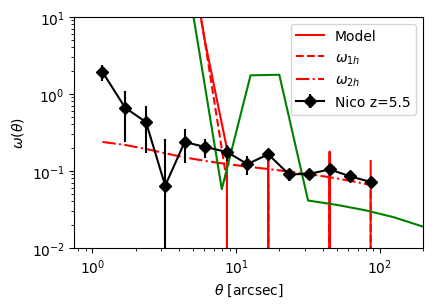

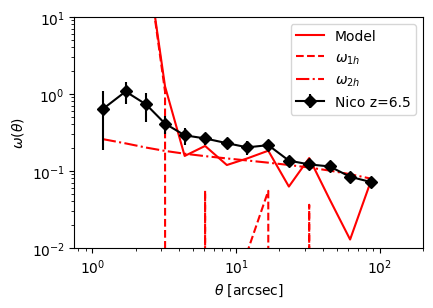

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
ax.plot(bin_centre_theta_N_z5, o1_N_z5+o2_N_z5, c = 'r', ls = '-', label='Model')
if 1:
    ax.plot(bin_centre_theta_N_z5, o1_N_z5, c = 'r', ls = '--', label=r'$\omega_{1h}$')
    ax.plot(bin_centre_theta_N_z5, o2_N_z5, c = 'r', ls = '-.', label=r'$\omega_{2h}$')
ax.errorbar(bin_centre_theta_N_z5, w_N_z5, yerr=w_err_N_z5, c = 'k', marker = 'D', label=f'Nico z={z_N_z5:.1f}')
ax.plot(th_arr, _o5+o2_5, c = 'g', ls = '-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.75,2e2))
ax.set_ylim((1e-2, 1e1))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
plt.legend()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
ax.plot(bin_centre_theta_N_z6, o1_N_z6+o2_N_z6, c = 'r', ls = '-', label='Model')
if 1:
    ax.plot(bin_centre_theta_N_z6, o1_N_z6, c = 'r', ls = '--', label=r'$\omega_{1h}$')
    ax.plot(bin_centre_theta_N_z6, o2_N_z6, c = 'r', ls = '-.', label=r'$\omega_{2h}$')
ax.errorbar(bin_centre_theta_N_z6, w_N_z6, yerr=w_err_N_z6, c = 'k', marker = 'D', label=f'Nico z={z_N_z6:.1f}')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.75,2e2))
ax.set_ylim((1e-2, 1e1))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
plt.legend()
plt.show()